In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import yfinance as yf

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12

# Задание №1

Скачаем тикеры всех немецких компаний по [ссылке](https://investexcel.net/stocks-traded-german-exchanges/).

In [23]:
companies = pd.read_excel("German Traded Companies.xlsx")
companies = list(companies['Ticker'])

In [24]:
data = yf.download(companies[:300],'2018-01-02','2018-12-31')[['Close', 'Volume']]
indexes = yf.download(['^GDAXI'],'2018-01-02','2018-12-31')[['Close', 'Volume']]

[*********************100%%**********************]  300 of 300 completed

99 Failed downloads:
['TO7.BE', '0JR.BE', '3XD.BE', 'JASN.BE', 'AE2.BE', 'WL3N.BE', 'H8N.BE', 'RHI.BE', 'JP2.BE', 'TDC.BE', 'PZRA.BE', 'G2K1.BE', 'SJ2A.BE', 'JAV.BE', 'YC5.BE', 'D1U.BE', 'OLB.BE', 'DCH1.BE', 'H2R.BE', 'MCN.BE', 'TBM.BE', '3SY.BE', 'D4K.BE', '4QO.BE', 'SHO.BE', 'JUD.BE', 'WFG1.BE', 'XCIA.BE', 'RFH1.BE', 'TOH.BE', 'TH7.BE', 'UDNA.BE', 'VLON.BE', '6PL.BE', 'XST.BE', 'HDJ0.BE', 'JJO.BE', 'JIM.BE', 'JJ1.BE', 'OKI.BE', 'CY1.MU', 'R6C1.BE', 'SQY1.BE', 'JIN.BE', 'JP0.BE', 'QJE.BE', 'E8T.BE', 'I6I.BE', 'JRB1.BE', 'TLI.BE', 'KO71.BE', 'MITA.BE', 'JEG.BE', 'JW2.BE', 'PM6.BE', 'SEE.BE', 'TKM.BE', 'ZEF.BE', 'SBYA.BE', 'SLT.BE', '24W2.BE', 'KRY.BE', 'JKX.BE', 'MAN.BE', 'J4Q.BE', 'LCY.BE', 'NP7.BE', 'XOT.BE', 'J00.BE', 'VWS.BE', 'NEX.BE', 'EO7.BE', 'UWQ.BE', 'YMT.BE', 'KYRA.BE', 'JCN.BE', 'J9B.BE', 'NG4.BE', 'YTT.BE', 'JSO1.BE', 'YIS.BE', 'PPA.BE', 'T41.BE', '0MJA.BE', '6AT.BE', 'J6W.BE', 'VAC.BE', '3GZA.BE', '

In [25]:
prices, volume = data['Close'], data['Volume']
prices = prices.dropna(axis=1, how='any')
volume = volume.loc[:, prices.columns]

prices = prices.reset_index()
indexes = indexes.reset_index()
volume = volume.reset_index()

prices = prices[prices['Date']!='2018-05-21']
volume = volume[volume['Date']!='2018-05-21']

Просмотрим загруженные данные.

In [27]:
prices

Ticker,Date,0C2.BE,0WP.BE,1CT.BE,1JP.BE,1RH.BE,3G6.BE,4D7.BE,4HP.BE,4J2.BE,...,XEB.BE,XKR.BE,XSC.BE,XSI.BE,YGB.BE,YJ3A.BE,YP6.BE,YSX.BE,ZAS.BE,ZOF.BE
0,2018-01-02,10.10,15.085,0.850,9.427,20.475000,13.933333,166.000000,10.20,123.000000,...,12.205,15.717111,61.500000,42.400002,36.535000,5.094,0.500,0.0100,83.180000,17.389999
1,2018-01-03,10.20,15.045,0.880,9.450,20.400000,13.933333,165.000000,10.20,128.000000,...,12.600,15.864424,61.500000,42.400002,35.799999,5.200,0.500,0.0100,82.000000,18.500000
2,2018-01-04,10.30,14.610,0.905,9.550,20.799999,14.133333,157.000000,10.40,128.000000,...,12.900,16.091059,63.500000,44.000000,35.599998,5.200,0.500,0.0105,82.500000,22.000000
3,2018-01-05,10.30,14.760,0.880,9.550,20.600000,15.466666,157.000000,10.10,127.000000,...,12.800,16.091059,62.500000,43.400002,35.599998,5.100,0.500,0.0105,83.000000,19.900000
4,2018-01-08,10.30,15.065,0.885,9.550,20.600000,14.933333,158.000000,10.10,128.000000,...,12.900,16.242147,63.000000,43.599998,36.200001,5.200,0.500,0.0100,84.000000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2018-12-19,12.34,9.750,0.700,9.840,21.280001,8.730000,119.830002,10.04,115.349998,...,15.550,16.378128,72.570000,39.689999,36.099998,5.430,0.375,0.0040,77.370003,18.750000
248,2018-12-20,12.51,9.600,0.697,9.850,20.879999,8.096666,117.019997,9.64,111.040001,...,15.050,15.671784,70.480003,37.150002,35.020000,5.180,0.375,0.0040,76.360001,17.610001
249,2018-12-21,12.26,9.440,0.691,9.790,20.860001,8.150000,117.430000,9.43,111.400002,...,14.800,15.675561,71.430000,36.259998,35.099998,5.380,0.375,0.0060,75.169998,17.360001
250,2018-12-27,12.24,9.440,0.705,9.850,21.430000,8.036666,117.139999,9.58,111.580002,...,14.800,15.516917,71.150002,37.590000,35.619999,5.120,0.375,0.0050,75.589996,16.920000


In [28]:
volume

Ticker,Date,0C2.BE,0WP.BE,1CT.BE,1JP.BE,1RH.BE,3G6.BE,4D7.BE,4HP.BE,4J2.BE,...,XEB.BE,XKR.BE,XSC.BE,XSI.BE,YGB.BE,YJ3A.BE,YP6.BE,YSX.BE,ZAS.BE,ZOF.BE
0,2018-01-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1200,0,0,0,0
1,2018-01-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2000,0,0,0,0
2,2018-01-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2200,0,0,0,200
3,2018-01-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8334,0,0,100
4,2018-01-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2018-12-19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,2018-12-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
249,2018-12-21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,2018-12-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30000,0,0,0


In [29]:
indexes

,Date,Close,Volume
0,2018-01-02,12871.389648,86049300
1,2018-01-03,12978.209961,84809300
2,2018-01-04,13167.889648,101199400
3,2018-01-05,13319.639648,112555000
4,2018-01-08,13367.780273,95005300
...,...,...,...
246,2018-12-19,10766.209961,96506200
247,2018-12-20,10611.099609,122450600
248,2018-12-21,10633.820312,216162200
249,2018-12-27,10381.509766,104152600


Сохраним данные.

In [30]:
prices.to_csv('prices.csv')
volume.to_csv('volume.csv')
indexes.to_csv('indexes.csv')

# Чтение данных

In [31]:
prices = pd.read_csv('prices.csv')
volume = pd.read_csv('volume.csv')
indexes = pd.read_csv('indexes.csv')

prices.drop(columns=['Unnamed: 0'], inplace=True)
volume.drop(columns=['Unnamed: 0'], inplace=True)
indexes.drop(columns=['Unnamed: 0'], inplace=True)

# Задание №2

Вычисление логарифмических доходностей.

In [32]:
returns = {}
for i in prices.drop(columns=['Date']).columns:
    returns[i] = np.log(np.array(prices[i])[1:]/np.array(prices[i])[:-1])
returns = pd.DataFrame(returns)

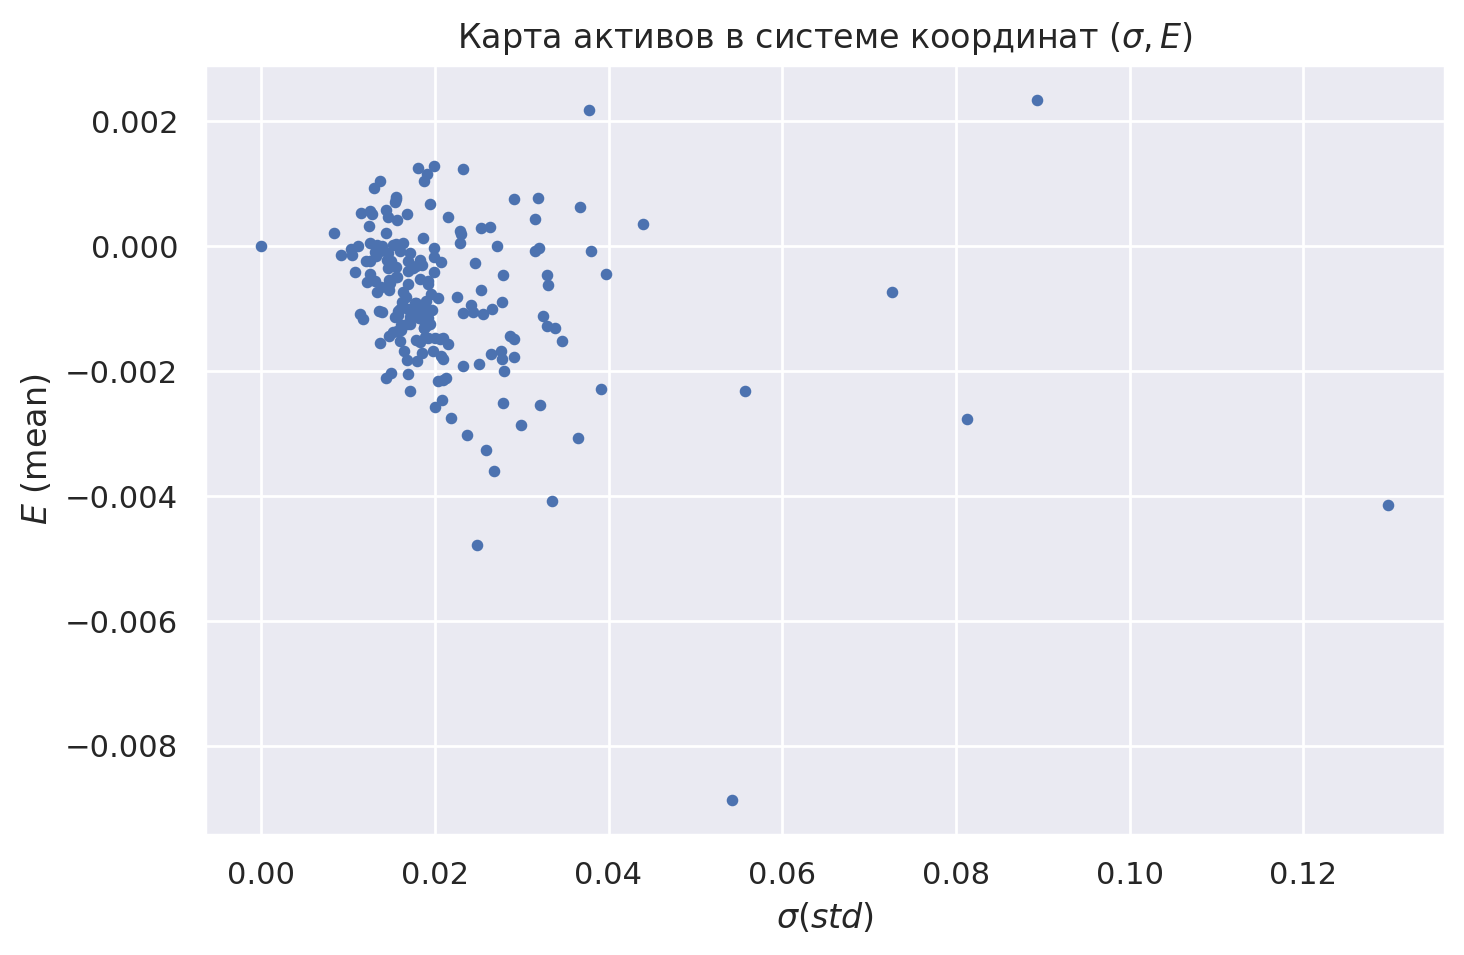

In [33]:
std, mean = returns.std(), returns.mean()
plt.scatter(std, mean, s=10)
plt.xlabel('$\sigma (std)$')
plt.ylabel('$E$ (mean)')
plt.title('Карта активов в системе координат $(\sigma, E)$')
plt.show()